Fiche python : Exemple avec un df provenant de kaggle 


In [5]:
# chargement 
df=pd.read_csv("data_fiche/weight-height-bmi.csv.xls")

In [6]:
df.head(5)

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight


# Python

In [12]:
#packages à importer, à installer via 'pip install --' si pas encore installés

## pour la manipulation des données 
import pandas as pd
## pour les calculs
import numpy as np

## pour les graphiques
import matplotlib.pyplot as plt

## autres ...

## Statistiques descriptives
• Etude de la distribution d'une variable par : 
Boxplot puis suppression des outliers après les avoir analysés.  
Quand utiliser un box-plot ?  
Il est intéressant d'utiliser les box-plot lorsqu'on désire visualiser des conepts tels que la symétrie, la dispersion ou la centralité de la distribution des valeurs associées à une variable.
Ils sont aussi très intéressant pour comparer des variables basées sur des échelles similaires et pour comparer les valeurs des observations de groupes d'individus sur la même variable.

• • comparaison à une distribution normale

### Code
#### Histogramme et Boxplot

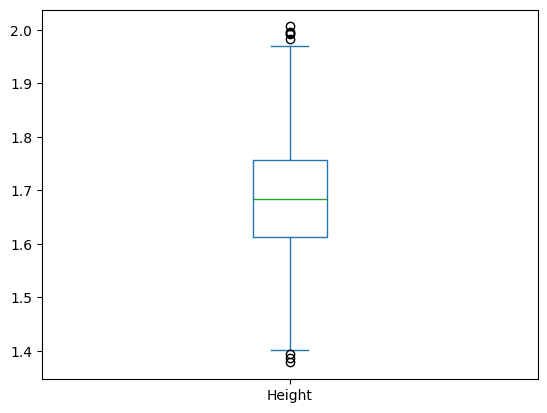

,Gender,Height,Weight,BMI
994,Male,1.983635,115.979317,Overweight
1317,Male,1.992936,103.120769,Overweight
2014,Male,2.006568,122.465167,Obesity
3285,Male,1.994617,115.162021,Overweight
3757,Male,1.996983,111.462878,Overweight
6624,Female,1.387268,32.383633,Underweight
7294,Female,1.393793,35.655357,Underweight
9285,Female,1.378284,29.347460,Underweight


In [19]:

df['Weight'].plot.hist(bins=20) # Histogramme en utilisant pyplot de matplotlib
plt.close()

df['Height'].plot.box()
plt.show()
# On voit ici beaucoup d'outliers que l'on souhaite retirer de notre jeu de données

# ------------------------------------------------------------------------------------------
# pour en savoir plus sur les Valeurs aberrantes : 
# https://mrmint.fr/outliers-machine-learning#:~:text=Si%20votre%20modèle%20prédictif%20est,sans%20hésiter%2C%20supprimez%20ces%20valeurs%20!

# ------------------------------------------------------------------------------------------

# On ne va garder que les valeurs entre les deux limites (inf et sup)
# Calcul des quantiles 
Q1=df['Height'].quantile(0.25) # 75% des données sont supérieures
Q3=df['Height'].quantile(0.75) # 25% des données sont supérieurs
IQR=Q3-Q1
coeff=IQR*1.5

# valeurs limites 
lim_inf=Q1-coeff
lim_sup=Q3+coeff

# sélection des données 
result=df[(df.Height>lim_sup)|(df.Height<lim_inf)]
#result